### 3. High-level analysis

Perform **at least 6** higher-level analyses of your data. You are free to use any techniques we discussed in class, including but not limited to:

* Use Pandas features to answer specific questions about the data
* Perform a cluster analysis to identify groups within your data
* Identify and motivate a machine learning problem in your data (classification or regression). Create a train/test/validation split and evaluate how well an appropriate model performs
* Perform a linear regression to show the relationship between two variables

If applicable to an analysis, you **must** include:

* Appropriate statistical test(s)
* An appropriate visualization.

Please take advantage of the check-ins or office hours if you are unsure whether a visualization or statistical test is necessary for an analysis.

In [1]:
import pandas as pd

df = pd.read_csv("../datasets/processed/arrests2025_cleaned.csv")
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])
df.head()

ARREST_KEY ARREST_DATE  PD_CD                         PD_DESC  KY_CD  \
0   298799078  2025-01-02    101                       ASSAULT 3  344.0   
1   299008265  2025-01-07    105               STRANGULATION 1ST  106.0   
2   298969999  2025-01-06    793            WEAPONS POSSESSION 3  118.0   
3   299436365  2025-01-14    157                          RAPE 1  104.0   
4   299562518  2025-01-16    397  ROBBERY,OPEN AREA UNCLASSIFIED  105.0   

                      OFNS_DESC    LAW_CODE LAW_CAT_CD ARREST_BORO  \
0  ASSAULT 3 & RELATED OFFENSES  PL 1200001          M           M   
1                FELONY ASSAULT  PL 1211200          F           Q   
2             DANGEROUS WEAPONS  PL 2650201          F           M   
3                          RAPE  PL 130352B          F           Q   
4                       ROBBERY  PL 1601504          F           M   

   ARREST_PRECINCT  ...  PERP_RACE X_COORD_CD Y_COORD_CD   Latitude  \
0               23  ...      BLACK    1000213     228833  40.794755   
1              113  ...      BLACK    1046399     187126  40.680086   
2                5  ...      WHITE     983907     199958  40.715526   
3              112  ...      BLACK    1025401     202586  40.722641   
4               26  ...      BLACK     996342     236149  40.814853   

   Longitude                     New Georeferenced Column  MIN_AGE  MAX_AGE  \
0 -73.942348  POINT (-73.9423482609703 40.79475532416718)       25       44   
1 -73.775931                 POINT (-73.775931 40.680086)       45       64   
2 -74.001238                 POINT (-74.001238 40.715526)       25       44   
3 -73.851542   POINT (-73.8515418216779 40.7226409964758)       45       64   
4 -73.956314                 POINT (-73.956314 40.814853)        0       17   

  DAY_OF_WEEK    MONTH  
0    Thursday  January  
1     Tuesday  January  
2      Monday  January  
3     Tuesday  January  
4    Thursday  January  

[5 rows x 23 columns]

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71028 entries, 0 to 71027
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ARREST_KEY                71028 non-null  int64         
 1   ARREST_DATE               71028 non-null  datetime64[ns]
 2   PD_CD                     71028 non-null  int64         
 3   PD_DESC                   71028 non-null  object        
 4   KY_CD                     71024 non-null  float64       
 5   OFNS_DESC                 71028 non-null  object        
 6   LAW_CODE                  71028 non-null  object        
 7   LAW_CAT_CD                70668 non-null  object        
 8   ARREST_BORO               71028 non-null  object        
 9   ARREST_PRECINCT           71028 non-null  int64         
 10  JURISDICTION_CODE         71028 non-null  int64         
 11  AGE_GROUP                 71028 non-null  object        
 12  PERP_SEX          

In [3]:
df.describe()

ARREST_KEY                    ARREST_DATE         PD_CD  \
count  7.102800e+04                          71028  71028.000000   
mean   3.011803e+08  2025-02-14 07:37:33.421186048    457.652841   
min    2.987043e+08            2025-01-01 00:00:00     12.000000   
25%    2.999045e+08            2025-01-23 00:00:00    205.000000   
50%    3.011153e+08            2025-02-14 00:00:00    439.000000   
75%    3.023162e+08            2025-03-09 00:00:00    729.000000   
max    3.040454e+08            2025-03-31 00:00:00    969.000000   
std    1.492713e+06                            NaN    274.364012   

              KY_CD  ARREST_PRECINCT  JURISDICTION_CODE    X_COORD_CD  \
count  71024.000000     71028.000000       71028.000000  7.102800e+04   
mean     262.009110        63.297305           0.872909  1.005444e+06   
min      101.000000         1.000000           0.000000  9.140420e+05   
25%      117.000000        40.000000           0.000000  9.905030e+05   
50%      341.000000        62.000000           0.000000  1.004979e+06   
75%      344.000000       101.000000           0.000000  1.017478e+06   
max      995.000000       123.000000          97.000000  1.067185e+06   
std      148.759832        34.969475           6.450684  2.130303e+04   

          Y_COORD_CD      Latitude     Longitude       MIN_AGE       MAX_AGE  
count   71028.000000  71028.000000  71028.000000  71028.000000  71028.000000  
mean   207442.010052     40.736012    -73.923497     28.088613     45.378766  
min    121673.000000     40.500390    -74.252488      0.000000     17.000000  
25%    184886.000000     40.674095    -73.977429     25.000000     44.000000  
50%    206619.000000     40.733735    -73.925119     25.000000     44.000000  
75%    235949.000000     40.814270    -73.879861     25.000000     44.000000  
max    271303.000000     40.911307    -73.700719     65.000000     99.000000  
std     29733.420922      0.081616      0.076828     11.576775     14.971577

In [4]:
df_demographics = df.groupby(['ARREST_BORO','AGE_GROUP', 'PERP_SEX', 'PERP_RACE']).size().reset_index(name='ARREST_COUNT')
df_demographics.head()

ARREST_BORO AGE_GROUP PERP_SEX                 PERP_RACE  ARREST_COUNT
0           B     18-24        F  ASIAN / PACIFIC ISLANDER             5
1           B     18-24        F                     BLACK           232
2           B     18-24        F            BLACK HISPANIC            67
3           B     18-24        F                   UNKNOWN             4
4           B     18-24        F                     WHITE            13

In [5]:
desired_order = ['<18', '18-24', '25-44', '45-64', '65+']
df_demographics['AGE_GROUP'] = pd.Categorical(df_demographics['AGE_GROUP'], categories=desired_order, ordered=True)
df_demographics = df_demographics.sort_values(by='AGE_GROUP')
df_demographics.head()



ARREST_BORO AGE_GROUP PERP_SEX       PERP_RACE  ARREST_COUNT
312           S       <18        M  WHITE HISPANIC            14
187           M       <18        M           WHITE            11
186           M       <18        M         UNKNOWN             1
51            B       <18        F           BLACK            65
52            B       <18        F  BLACK HISPANIC            25

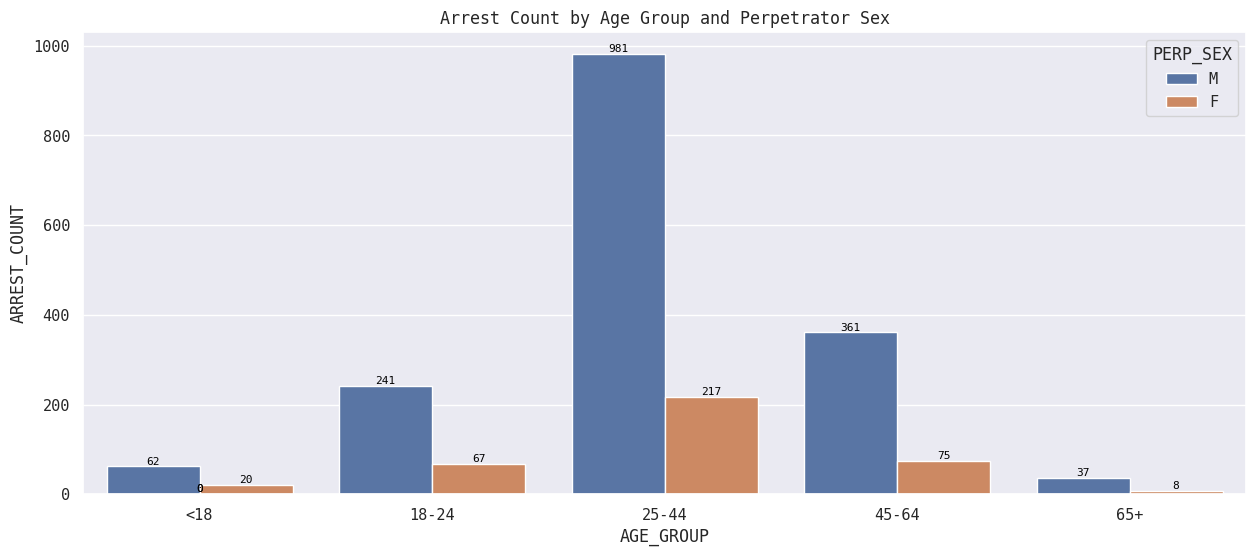

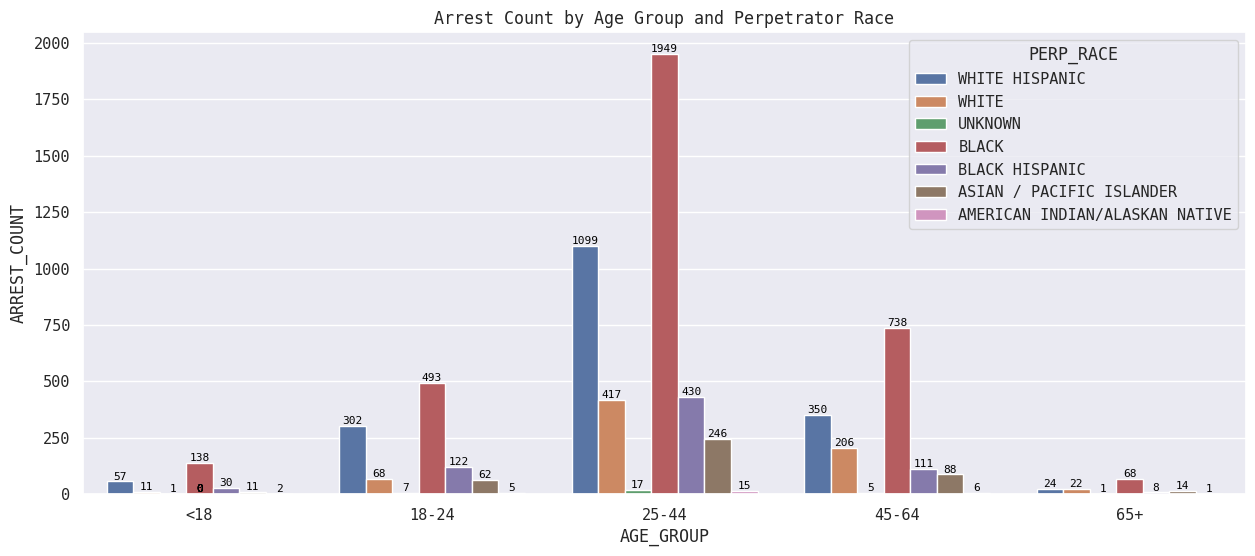

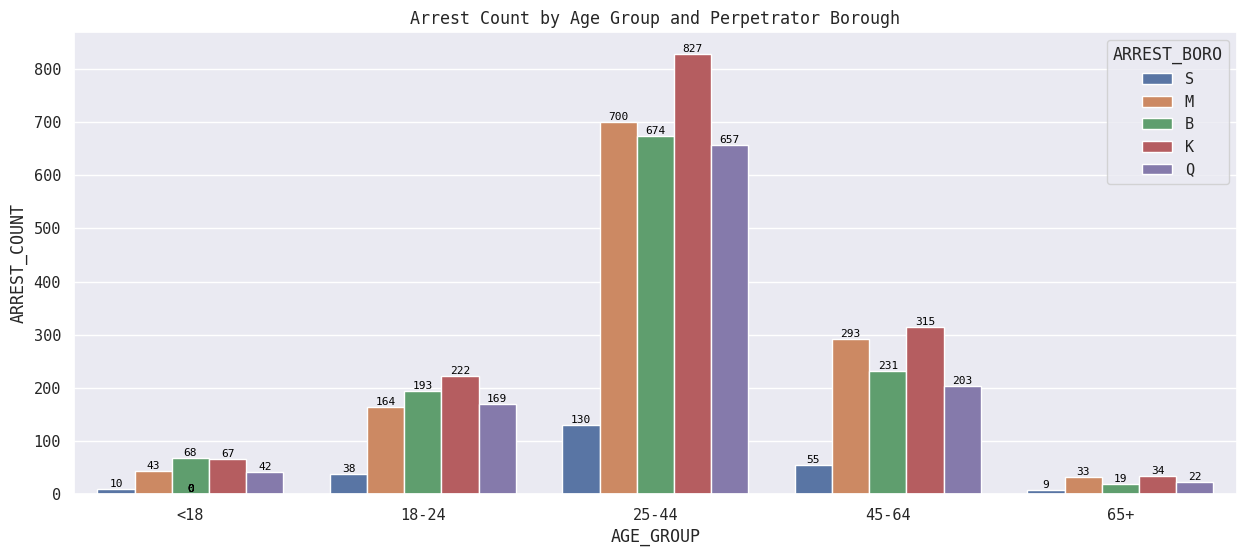

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='monospace', font_scale=1, color_codes=True)

# Create a grouped bar chart for `AGE_GROUP` by `PERP_SEX`
plt.figure(figsize=(15, 6))
a = sns.barplot(data=df_demographics, x='AGE_GROUP', y='ARREST_COUNT', hue='PERP_SEX', errorbar=None)
plt.title('Arrest Count by Age Group and Perpetrator Sex')
for p in a.patches:
    height = p.get_height()
    a.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height), 
               ha='center', va='bottom', fontsize=8, color='black')
plt.show()

# Create a grouped bar chart for `AGE_GROUP` by `PERP_RACE`
plt.figure(figsize=(15, 6))
b = sns.barplot(data=df_demographics, x='AGE_GROUP', y='ARREST_COUNT', hue='PERP_RACE', errorbar=None)
plt.title('Arrest Count by Age Group and Perpetrator Race')
for p in b.patches:
    height = p.get_height()
    b.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height), 
               ha='center', va='bottom', fontsize=8, color='black')
plt.show()

# Create a grouped bar chart for `AGE_GROUP` by `PERP_RACE`
plt.figure(figsize=(15, 6))
c = sns.barplot(data=df_demographics, x='AGE_GROUP', y='ARREST_COUNT', hue='ARREST_BORO', errorbar=None)
plt.title('Arrest Count by Age Group and Perpetrator Borough')
for p in c.patches:
    height = p.get_height()
    c.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height), 
               ha='center', va='bottom', fontsize=8, color='black')
plt.show()

In [7]:
count = df['OFNS_DESC'].value_counts().reset_index()
count

OFNS_DESC  count
0       ASSAULT 3 & RELATED OFFENSES   9185
1                      PETIT LARCENY   7447
2                    DANGEROUS DRUGS   6146
3                     FELONY ASSAULT   5285
4            MISCELLANEOUS PENAL LAW   4730
5    OTHER OFFENSES RELATED TO THEFT   4658
6           VEHICLE AND TRAFFIC LAWS   4570
7     CRIMINAL MISCHIEF & RELATED OF   3029
8                  DANGEROUS WEAPONS   2636
9                            ROBBERY   2613
10                     GRAND LARCENY   2548
11    OFFENSES AGAINST PUBLIC ADMINI   2353
12                  OTHER STATE LAWS   2035
13                          BURGLARY   1844
14                        SEX CRIMES   1456
15     OFF. AGNST PUB ORD SENSBLTY &   1363
16                           FORGERY   1188
17          OFFENSES INVOLVING FRAUD   1005
18                 CRIMINAL TRESPASS    900
19     POSSESSION OF STOLEN PROPERTY    817
20    INTOXICATED & IMPAIRED DRIVING    734
21          OTHER TRAFFIC INFRACTION    711
22       OFFENSES AGAINST THE PERSON    405
23    MURDER & NON-NEGL. MANSLAUGHTE    400
24                            FRAUDS    375
25             FOR OTHER AUTHORITIES    360
26    GRAND LARCENY OF MOTOR VEHICLE    354
27                              RAPE    232
28                   BURGLAR'S TOOLS    222
29   PROSTITUTION & RELATED OFFENSES    201
30                          GAMBLING    161
31     UNAUTHORIZED USE OF A VEHICLE    130
32  OTHER STATE LAWS (NON PENAL LAW)    122
33                       THEFT-FRAUD    111
34                MOVING INFRACTIONS    107
35         CANNABIS RELATED OFFENSES    105
36      INTOXICATED/IMPAIRED DRIVING     81
37    ALCOHOLIC BEVERAGE CONTROL LAW     73
38               ADMINISTRATIVE CODE     51
39             ANTICIPATORY OFFENSES     44
40      OFFENSES RELATED TO CHILDREN     35
41                             ARSON     34
42    OFFENSES AGAINST PUBLIC SAFETY     33
43                DISORDERLY CONDUCT     31
44   CHILD ABANDONMENT/NON SUPPORT 1     31
45     KIDNAPPING & RELATED OFFENSES     24
46                     HARRASSMENT 2     17
47                          JOSTLING     13
48              FRAUDULENT ACCOSTING     11
49                            (null)      4
50    HOMICIDE-NEGLIGENT,UNCLASSIFIE      3
51    UNLAWFUL POSS. WEAP. ON SCHOOL      1
52                          ESCAPE 3      1
53        HOMICIDE-NEGLIGENT-VEHICLE      1
54              ADMINISTRATIVE CODES      1
55         NEW YORK CITY HEALTH CODE      1

<Axes: xlabel='count', ylabel='OFNS_DESC'>

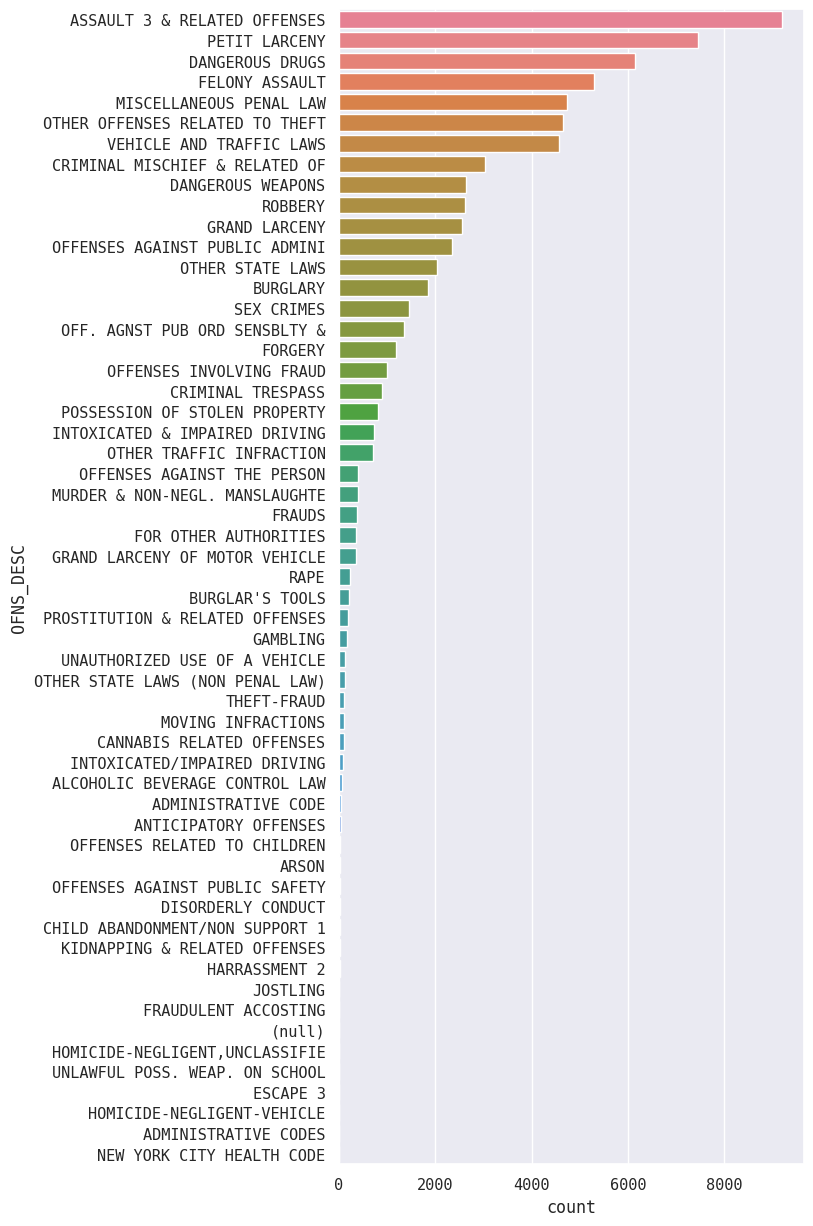

In [8]:
plt.figure(figsize=(6, 15))
sns.barplot(count, x='count', y='OFNS_DESC', hue='OFNS_DESC')

In [9]:
top5 = [
    "ASSAULT 3 & RELATED OFFENSES",
    "PETIT LARCENY",
    "DANGEROUS DRUGS",
    "FELONY ASSAULT",
    "MISCELLANEOUS PENAL LAW"
]

top5_df = df[df['OFNS_DESC'].isin(top5)]
top5_df['OFNS_DESC'].value_counts()

OFNS_DESC
ASSAULT 3 & RELATED OFFENSES    9185
PETIT LARCENY                   7447
DANGEROUS DRUGS                 6146
FELONY ASSAULT                  5285
MISCELLANEOUS PENAL LAW         4730
Name: count, dtype: int64

In [10]:
boro_table = pd.crosstab(top5_df['ARREST_BORO'], top5_df['OFNS_DESC'])
boro_table

OFNS_DESC    ASSAULT 3 & RELATED OFFENSES  DANGEROUS DRUGS  FELONY ASSAULT  \
ARREST_BORO                                                                  
B                                    2334             1409            1514   
K                                    2562             1706            1451   
M                                    1792             1716             897   
Q                                    2116             1033            1232   
S                                     381              282             191   

OFNS_DESC    MISCELLANEOUS PENAL LAW  PETIT LARCENY  
ARREST_BORO                                          
B                                867           1033  
K                               1588           1711  
M                                707           2894  
Q                               1279           1380  
S                                289            429

In [11]:
from scipy import stats

chi2 = stats.chi2_contingency(boro_table)
chi2

Chi2ContingencyResult(statistic=np.float64(1818.6237346650298), pvalue=np.float64(0.0), dof=16, expected_freq=array([[2004.60601348, 1341.35095905, 1153.43960601, 1032.3120788 ,
        1625.29134266],
       [2525.85399323, 1690.13594365, 1453.36291282, 1300.73918214,
        2047.90796816],
       [2242.40264691, 1500.46888055, 1290.26652029, 1154.77022535,
        1818.09172689],
       [1971.83545269, 1319.4230476 , 1134.58360016, 1015.43622114,
        1598.72167841],
       [ 440.3018937 ,  294.62116915,  253.34736072,  226.74229256,
         356.98728387]]))

<Axes: xlabel='OFNS_DESC', ylabel='ARREST_BORO'>

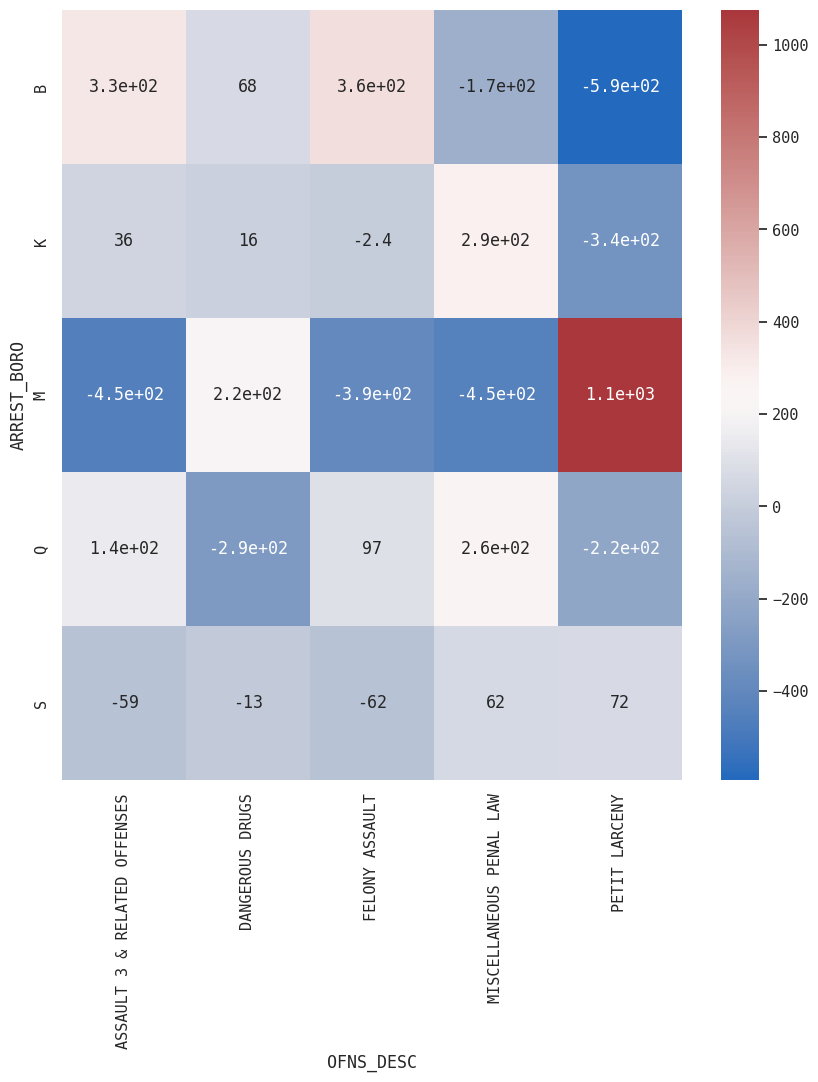

In [12]:
plt.figure(figsize = (10,10))
sns.heatmap(
    boro_table-chi2.expected_freq,
    cmap='vlag',
    annot=True
)

It appears that there are petit larceny charges in bronx that expected, and more in manhattan then expected, it seem overall manhattan has less charges then expected, while in petit larceny there are less in brooklyn and queens then expected also

In [13]:
for x in top5:
    print(x,'\n\n')
    temp_df = top5_df[top5_df['OFNS_DESC'] == x]
    print(temp_df['OFNS_DESC'].value_counts())

ASSAULT 3 & RELATED OFFENSES 


OFNS_DESC
ASSAULT 3 & RELATED OFFENSES    9185
Name: count, dtype: int64
PETIT LARCENY 


OFNS_DESC
PETIT LARCENY    7447
Name: count, dtype: int64
DANGEROUS DRUGS 


OFNS_DESC
DANGEROUS DRUGS    6146
Name: count, dtype: int64
FELONY ASSAULT 


OFNS_DESC
FELONY ASSAULT    5285
Name: count, dtype: int64
MISCELLANEOUS PENAL LAW 


OFNS_DESC
MISCELLANEOUS PENAL LAW    4730
Name: count, dtype: int64


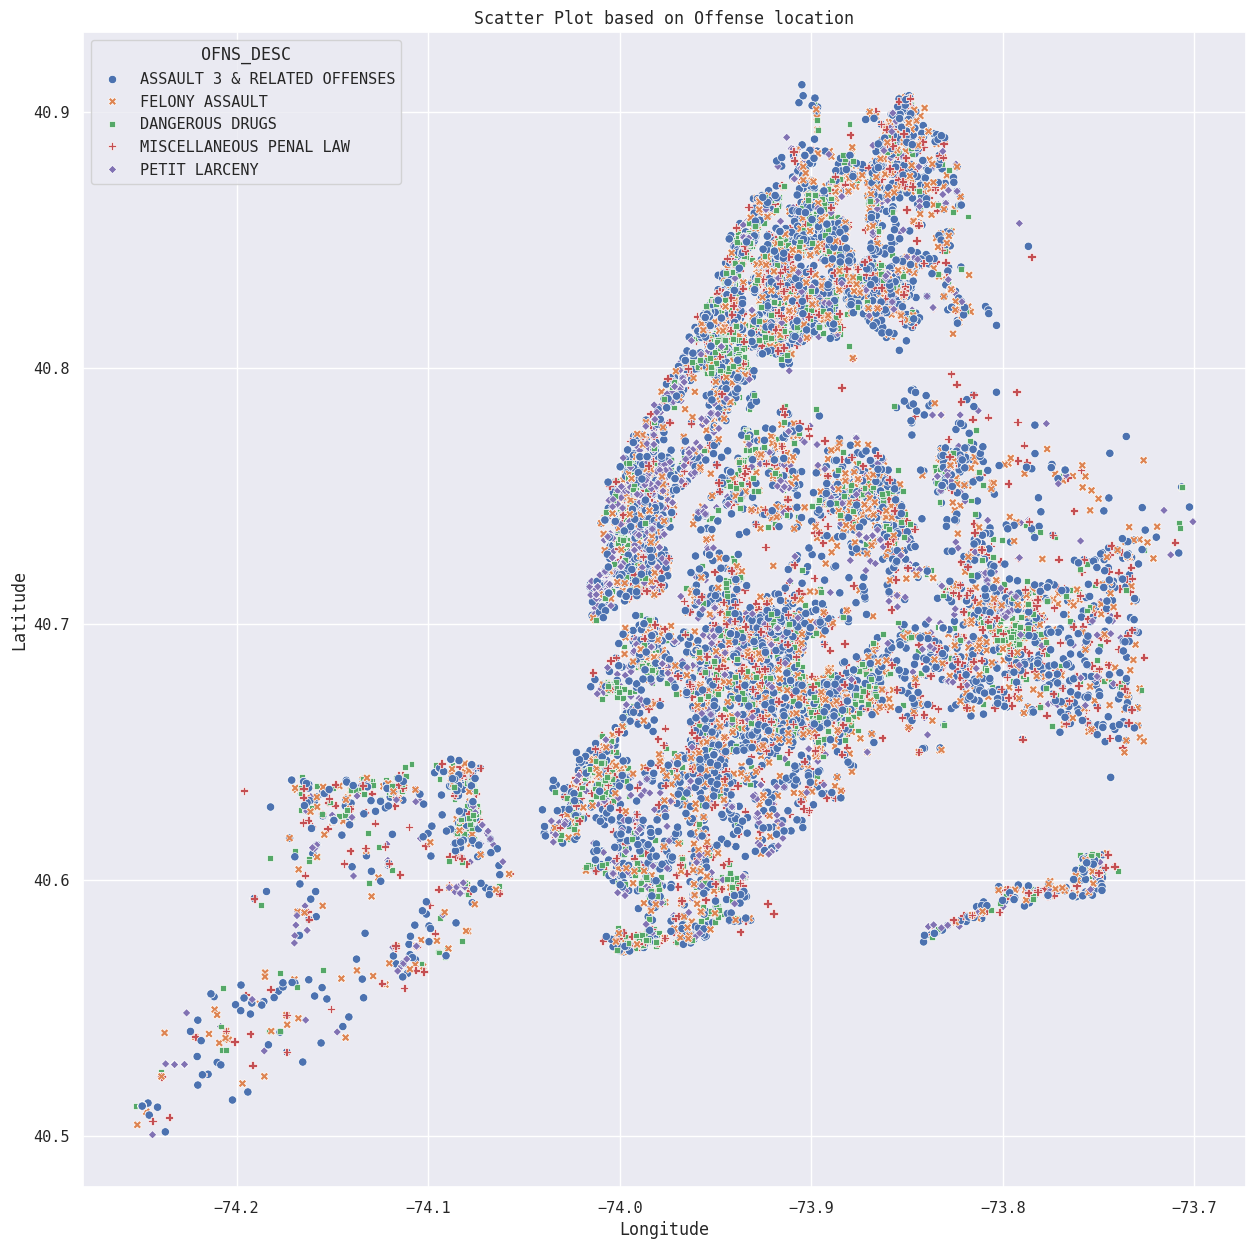

In [14]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=top5_df, x='Longitude', y='Latitude', hue='OFNS_DESC', style='OFNS_DESC')
plt.title('Scatter Plot based on Offense location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
x_columns = ['ARREST_BORO', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE']
y_column = 'ARREST_COUNT'

X = df_demographics[x_columns]
y = df_demographics[y_column]

In [17]:
categorical_features = ['ARREST_BORO', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ]
)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
linear_reg_model = LinearRegression()
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', linear_reg_model)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['ARREST_BORO', 'AGE_GROUP',
                                                   'PERP_SEX',
                                                   'PERP_RACE'])])),
                ('regressor', LinearRegression())])

In [20]:
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

In [21]:
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = mse_train**0.5
r2_train = r2_score(y_train, y_pred_train)

print("--- Training Set Evaluation ---")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")
print("-" * 30)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mse_test**0.5
r2_test = r2_score(y_test, y_pred_test)

print("--- Test Set Evaluation ---")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²): {r2_test:.2f}")
print("-" * 30)

--- Training Set Evaluation ---
Mean Squared Error (MSE): 169199.92
Root Mean Squared Error (RMSE): 411.34
R-squared (R²): 0.42
------------------------------
--- Test Set Evaluation ---
Mean Squared Error (MSE): 221666.46
Root Mean Squared Error (RMSE): 470.81
R-squared (R²): 0.46
------------------------------


In [22]:
import folium

lat, lon= 40.7128, -74.0060
zoom_start = 11.5

In [23]:
m = folium.Map(location=[lat, lon], tiles="Cartodb Positron", zoom_start=zoom_start)

In [24]:
import geopandas

gdf = geopandas.read_file('../datasets/external/NYC_Police_Precincts.geojson')

folium.GeoJson(
    gdf,
).add_to(m)

m

In [25]:
df

ARREST_KEY ARREST_DATE  PD_CD  \
0       298799078  2025-01-02    101   
1       299008265  2025-01-07    105   
2       298969999  2025-01-06    793   
3       299436365  2025-01-14    157   
4       299562518  2025-01-16    397   
...           ...         ...    ...   
71023   303938395  2025-03-31    729   
71024   303885891  2025-03-30    478   
71025   303937884  2025-03-31    439   
71026   303887215  2025-03-30    478   
71027   303934479  2025-03-31    268   

                                         PD_DESC  KY_CD  \
0                                      ASSAULT 3  344.0   
1                              STRANGULATION 1ST  106.0   
2                           WEAPONS POSSESSION 3  118.0   
3                                         RAPE 1  104.0   
4                 ROBBERY,OPEN AREA UNCLASSIFIED  105.0   
...                                          ...    ...   
71023             FORGERY,ETC.,UNCLASSIFIED-FELO  113.0   
71024             THEFT OF SERVICES, UNCLASSIFIE  343.0   
71025  LARCENY,GRAND FROM OPEN AREAS, UNATTENDED  109.0   
71026             THEFT OF SERVICES, UNCLASSIFIE  343.0   
71027                         CRIMINAL MIS 2 & 3  121.0   

                             OFNS_DESC    LAW_CODE LAW_CAT_CD ARREST_BORO  \
0         ASSAULT 3 & RELATED OFFENSES  PL 1200001          M           M   
1                       FELONY ASSAULT  PL 1211200          F           Q   
2                    DANGEROUS WEAPONS  PL 2650201          F           M   
3                                 RAPE  PL 130352B          F           Q   
4                              ROBBERY  PL 1601504          F           M   
...                                ...         ...        ...         ...   
71023                          FORGERY  PL 1702500          F           M   
71024  OTHER OFFENSES RELATED TO THEFT  PL 1651503          M           B   
71025                    GRAND LARCENY  PL 1553501          F           M   
71026  OTHER OFFENSES RELATED TO THEFT  PL 1651503          M           B   
71027   CRIMINAL MISCHIEF & RELATED OF  PL 1450502          F           Q   

       ARREST_PRECINCT  ...       PERP_RACE X_COORD_CD Y_COORD_CD   Latitude  \
0                   23  ...           BLACK    1000213     228833  40.794755   
1                  113  ...           BLACK    1046399     187126  40.680086   
2                    5  ...           WHITE     983907     199958  40.715526   
3                  112  ...           BLACK    1025401     202586  40.722641   
4                   26  ...           BLACK     996342     236149  40.814853   
...                ...  ...             ...        ...        ...        ...   
71023               34  ...  BLACK HISPANIC    1004367     254624  40.865536   
71024               43  ...           BLACK    1022565     242793  40.833003   
71025               13  ...  WHITE HISPANIC     988986     207106  40.735143   
71026               47  ...           BLACK    1022187     261218  40.883576   
71027              103  ...           BLACK    1046499     197760  40.709273   

       Longitude                     New Georeferenced Column  MIN_AGE  \
0     -73.942348  POINT (-73.9423482609703 40.79475532416718)       25   
1     -73.775931                 POINT (-73.775931 40.680086)       45   
2     -74.001238                 POINT (-74.001238 40.715526)       25   
3     -73.851542   POINT (-73.8515418216779 40.7226409964758)       45   
4     -73.956314                 POINT (-73.956314 40.814853)        0   
...          ...                                          ...      ...   
71023 -73.927268              POINT (-73.9272684 40.86553571)       18   
71024 -73.861542              POINT (-73.8615425 40.83300293)       18   
71025 -73.982909                 POINT (-73.982909 40.735143)       25   
71026 -73.862804              POINT (-73.86280418 40.8835756)       25   
71027 -73.775469                 POINT (-73.775469 40.709273)       25   

       MAX_AGE DAY_OF_WEEK    MONTH  
0   

In [26]:
geometry = geopandas.points_from_xy(top5_df.Longitude, top5_df.Latitude)
geo_df = geopandas.GeoDataFrame(
    top5_df[['MONTH', 'ARREST_BORO', 'LAW_CAT_CD', 'OFNS_DESC', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE']], geometry=geometry
)
geo_df.head()

MONTH ARREST_BORO LAW_CAT_CD                     OFNS_DESC AGE_GROUP  \
0   January           M          M  ASSAULT 3 & RELATED OFFENSES     25-44   
1   January           Q          F                FELONY ASSAULT     45-64   
5   January           Q          F                FELONY ASSAULT     18-24   
6   January           Q          F                FELONY ASSAULT     45-64   
9  February           Q          F                FELONY ASSAULT     25-44   

  PERP_SEX PERP_RACE                    geometry  
0        F     BLACK  POINT (-73.94235 40.79476)  
1        M     BLACK  POINT (-73.77593 40.68009)  
5        M     BLACK  POINT (-73.77593 40.68009)  
6        F     BLACK  POINT (-73.78868 40.58979)  
9        M     BLACK  POINT (-73.79214 40.70745)

In [27]:
geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 32793 entries, 0 to 71019
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   MONTH        32793 non-null  object  
 1   ARREST_BORO  32793 non-null  object  
 2   LAW_CAT_CD   32793 non-null  object  
 3   OFNS_DESC    32793 non-null  object  
 4   AGE_GROUP    32793 non-null  object  
 5   PERP_SEX     32793 non-null  object  
 6   PERP_RACE    32793 non-null  object  
 7   geometry     32793 non-null  geometry
dtypes: geometry(1), object(7)
memory usage: 2.3+ MB


In [28]:
geo_df['MONTH'].value_counts()

MONTH
March       11418
January     11215
February    10160
Name: count, dtype: int64

In [29]:
months = ['January', 'February', 'March']

january_geo = geo_df[geo_df['MONTH'] == 'January']
february_geo = geo_df[geo_df['MONTH'] == 'February']
march_geo = geo_df[geo_df['MONTH'] == 'March']

In [30]:
january_geo.head()

MONTH ARREST_BORO LAW_CAT_CD                     OFNS_DESC AGE_GROUP  \
0   January           M          M  ASSAULT 3 & RELATED OFFENSES     25-44   
1   January           Q          F                FELONY ASSAULT     45-64   
5   January           Q          F                FELONY ASSAULT     18-24   
6   January           Q          F                FELONY ASSAULT     45-64   
31  January           B          F                FELONY ASSAULT     25-44   

   PERP_SEX       PERP_RACE                    geometry  
0         F           BLACK  POINT (-73.94235 40.79476)  
1         M           BLACK  POINT (-73.77593 40.68009)  
5         M           BLACK  POINT (-73.77593 40.68009)  
6         F           BLACK  POINT (-73.78868 40.58979)  
31        M  BLACK HISPANIC    POINT (-73.89924 40.817)

In [31]:
age_by_time = ['MONTH', 'DAY_OF_WEEK', "MIN_AGE", "MAX_AGE"]
df_age = df.groupby(age_by_time).size().reset_index(name='ARREST_COUNT')
df_age

MONTH DAY_OF_WEEK  MIN_AGE  MAX_AGE  ARREST_COUNT
0    February      Friday        0       17           104
1    February      Friday       18       24           467
2    February      Friday       25       44          1972
3    February      Friday       45       64           616
4    February      Friday       65       99            41
..        ...         ...      ...      ...           ...
100     March   Wednesday        0       17           154
101     March   Wednesday       18       24           601
102     March   Wednesday       25       44          2377
103     March   Wednesday       45       64           877
104     March   Wednesday       65       99            77

[105 rows x 5 columns]

In [32]:
month_order = ['January', 'February', 'March']
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df_age['MONTH'] = pd.Categorical(df_age['MONTH'], categories=month_order, ordered=True)
df_age['DAY_OF_WEEK'] = pd.Categorical(df_age['DAY_OF_WEEK'], categories=day_order, ordered=True)
df_age.sort_values(['MONTH', 'DAY_OF_WEEK'])

MONTH DAY_OF_WEEK  MIN_AGE  MAX_AGE  ARREST_COUNT
50  January      Sunday        0       17            85
51  January      Sunday       18       24           383
52  January      Sunday       25       44          1406
53  January      Sunday       45       64           462
54  January      Sunday       65       99            43
..      ...         ...      ...      ...           ...
80    March    Saturday        0       17            89
81    March    Saturday       18       24           532
82    March    Saturday       25       44          2003
83    March    Saturday       45       64           755
84    March    Saturday       65       99            67

[105 rows x 5 columns]

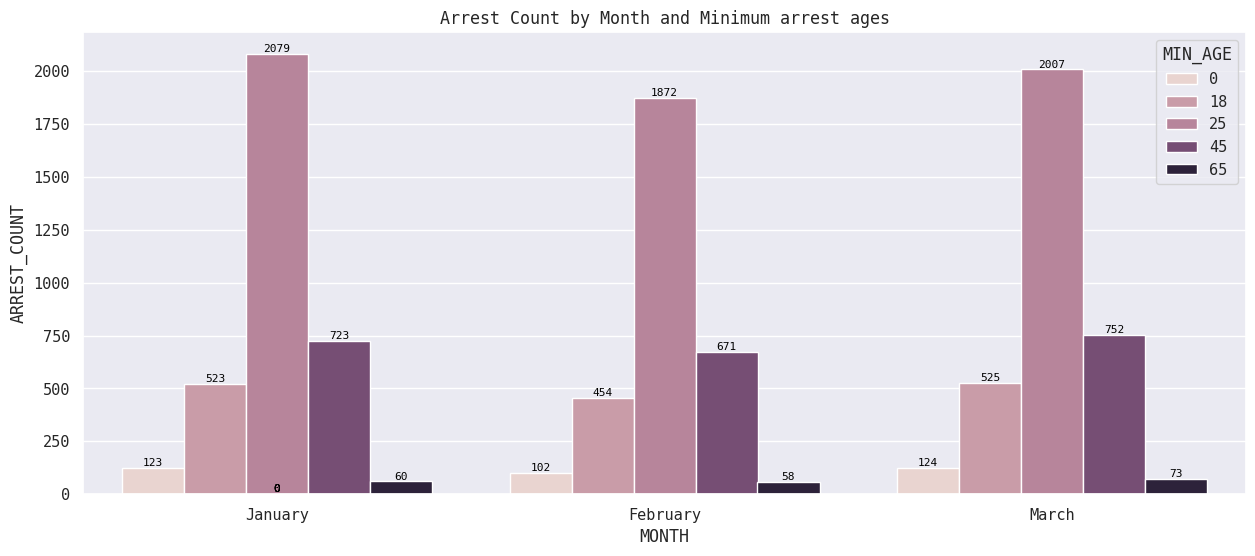

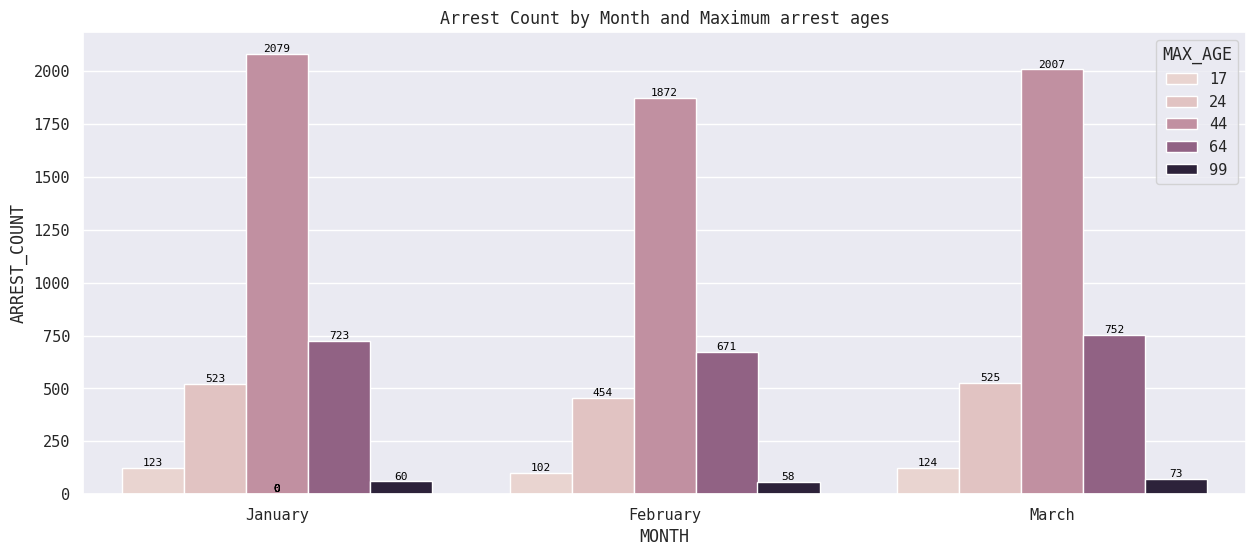

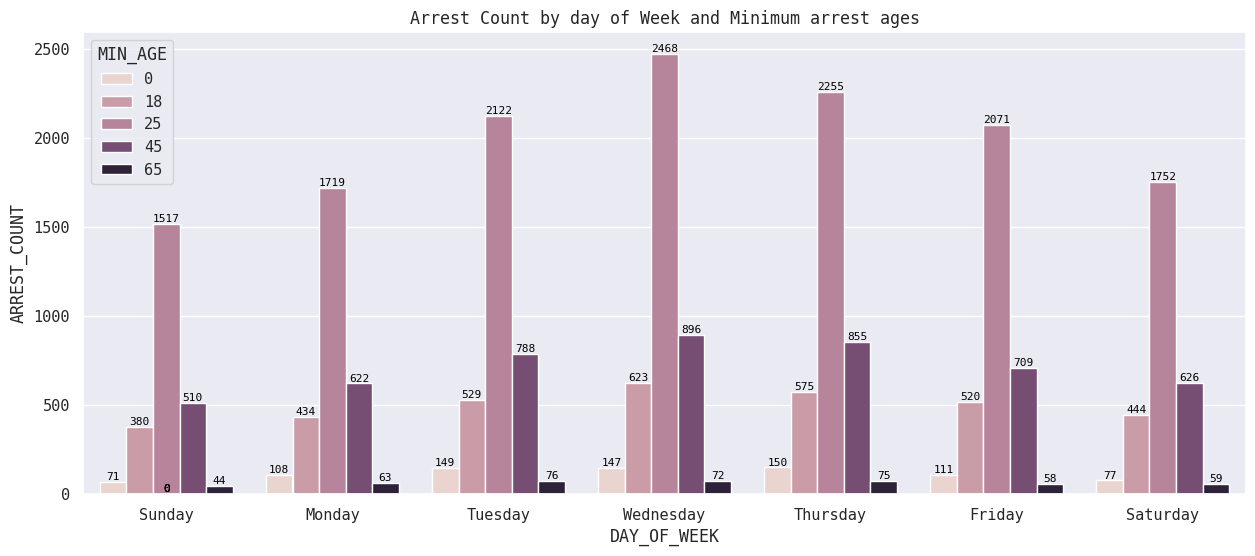

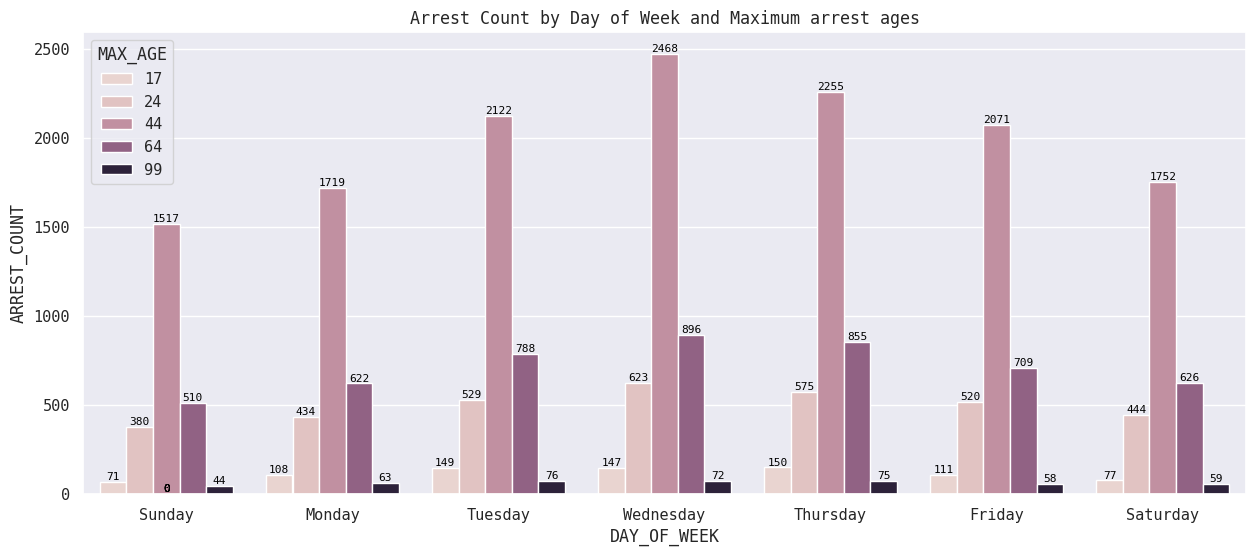

In [33]:
plt.figure(figsize=(15, 6))
a = sns.barplot(data=df_age, x='MONTH', y='ARREST_COUNT', hue='MIN_AGE', errorbar=None)
plt.title('Arrest Count by Month and Minimum arrest ages')
for p in a.patches:
    height = p.get_height()
    a.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height), 
               ha='center', va='bottom', fontsize=8, color='black')
plt.show()

plt.figure(figsize=(15, 6))
a = sns.barplot(data=df_age, x='MONTH', y='ARREST_COUNT', hue='MAX_AGE', errorbar=None)
plt.title('Arrest Count by Month and Maximum arrest ages')
for p in a.patches:
    height = p.get_height()
    a.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height), 
               ha='center', va='bottom', fontsize=8, color='black')
plt.show()

plt.figure(figsize=(15, 6))
a = sns.barplot(data=df_age, x='DAY_OF_WEEK', y='ARREST_COUNT', hue='MIN_AGE', errorbar=None)
plt.title('Arrest Count by day of Week and Minimum arrest ages')
for p in a.patches:
    height = p.get_height()
    a.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height), 
               ha='center', va='bottom', fontsize=8, color='black')
plt.show()

plt.figure(figsize=(15, 6))
a = sns.barplot(data=df_age, x='DAY_OF_WEEK', y='ARREST_COUNT', hue='MAX_AGE', errorbar=None)
plt.title('Arrest Count by Day of Week and Maximum arrest ages')
for p in a.patches:
    height = p.get_height()
    a.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height), 
               ha='center', va='bottom', fontsize=8, color='black')
plt.show()

In [34]:
X = df_age.drop('ARREST_COUNT', axis=1)
y = df_age[['ARREST_COUNT']]

print(X, '\n\n\n')
print(y)

        MONTH DAY_OF_WEEK  MIN_AGE  MAX_AGE
0    February      Friday        0       17
1    February      Friday       18       24
2    February      Friday       25       44
3    February      Friday       45       64
4    February      Friday       65       99
..        ...         ...      ...      ...
100     March   Wednesday        0       17
101     March   Wednesday       18       24
102     March   Wednesday       25       44
103     March   Wednesday       45       64
104     March   Wednesday       65       99

[105 rows x 4 columns] 



     ARREST_COUNT
0             104
1             467
2            1972
3             616
4              41
..            ...
100           154
101           601
102          2377
103           877
104            77

[105 rows x 1 columns]


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [36]:
numerical_transformer = StandardScaler()

categorical_features = ['MONTH', 'DAY_OF_WEEK']
numerical_features = ['MIN_AGE', 'MAX_AGE']

categorical_transformer = OneHotEncoder(handle_unknown='ignore', drop='first') # drop='first' to avoid multicollinearity

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', LinearRegression())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Testing set size: X_test {X_test.shape}, y_test {y_test.shape}")

model_pipeline.fit(X_train, y_train)
print("\nModel training complete.")

y_pred_train = model_pipeline.predict(X_train)
y_pred_test = model_pipeline.predict(X_test)


Training set size: X_train (84, 4), y_train (84, 1)
Testing set size: X_test (21, 4), y_test (21, 1)

Model training complete.


In [37]:
print("\n--- Model Evaluation ---")

mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print("\nTraining Set:")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")

# Test Set Performance
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nTest Set:")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"R-squared (R²): {r2_test:.2f}")


--- Model Evaluation ---

Training Set:
Mean Squared Error (MSE): 509362.07
Root Mean Squared Error (RMSE): 713.70
Mean Absolute Error (MAE): 564.22
R-squared (R²): 0.09

Test Set:
Mean Squared Error (MSE): 495092.07
Root Mean Squared Error (RMSE): 703.63
Mean Absolute Error (MAE): 625.62
R-squared (R²): -0.59


In [38]:
df_demographics.head(10)

ARREST_BORO AGE_GROUP PERP_SEX                 PERP_RACE  ARREST_COUNT
312           S       <18        M            WHITE HISPANIC            14
187           M       <18        M                     WHITE            11
186           M       <18        M                   UNKNOWN             1
51            B       <18        F                     BLACK            65
52            B       <18        F            BLACK HISPANIC            25
53            B       <18        F                     WHITE             2
54            B       <18        F            WHITE HISPANIC            35
55            B       <18        M  ASIAN / PACIFIC ISLANDER             9
56            B       <18        M                     BLACK           254
57            B       <18        M            BLACK HISPANIC           102

In [39]:
X2 = df_demographics.drop('ARREST_COUNT', axis=1)
y2 = df_demographics['ARREST_COUNT']

In [40]:
X = df_demographics.drop('ARREST_COUNT', axis=1)
y = df_demographics['ARREST_COUNT']

categorical_features = X.columns
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough' # In case there are other (numerical) columns not listed
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', LinearRegression())])

model_pipeline.fit(X_train, y_train)

print("Model training complete.")

y_pred_train = model_pipeline.predict(X_train)
y_pred_test = model_pipeline.predict(X_test)

print("\n--- Training Set Evaluation ---")
print(f"R-squared: {r2_score(y_train, y_pred_train):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_train, y_pred_train):.2f}")


print("\n--- Test Set Evaluation ---")
print(f"R-squared: {r2_score(y_test, y_pred_test):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_test):.2f}")


Model training complete.

--- Training Set Evaluation ---
R-squared: 0.42
Mean Absolute Error: 240.60
Mean Squared Error: 169199.92

--- Test Set Evaluation ---
R-squared: 0.46
Mean Absolute Error: 269.44
Mean Squared Error: 221666.46


In [41]:
df_demographics_advanced = top5_df.groupby(['OFNS_DESC','ARREST_BORO','AGE_GROUP', 'PERP_SEX', 'PERP_RACE']).size().reset_index(name='ARREST_COUNT')
df_demographics_advanced.head()

OFNS_DESC ARREST_BORO AGE_GROUP PERP_SEX  \
0  ASSAULT 3 & RELATED OFFENSES           B     18-24        F   
1  ASSAULT 3 & RELATED OFFENSES           B     18-24        F   
2  ASSAULT 3 & RELATED OFFENSES           B     18-24        F   
3  ASSAULT 3 & RELATED OFFENSES           B     18-24        F   
4  ASSAULT 3 & RELATED OFFENSES           B     18-24        F   

                  PERP_RACE  ARREST_COUNT  
0  ASIAN / PACIFIC ISLANDER             1  
1                     BLACK            65  
2            BLACK HISPANIC            17  
3                   UNKNOWN             1  
4                     WHITE             1

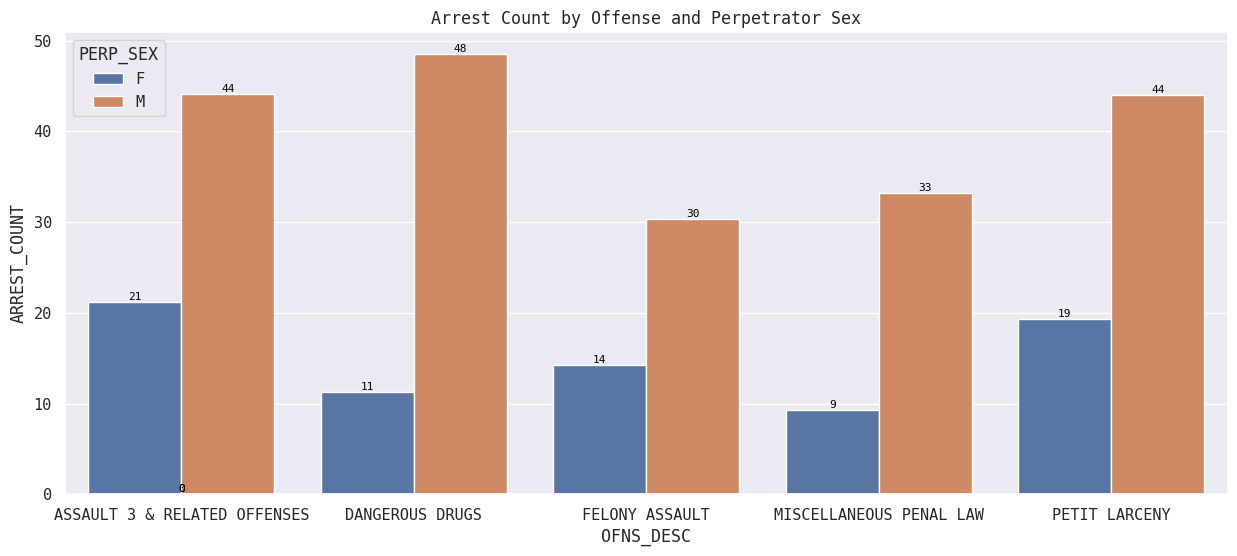

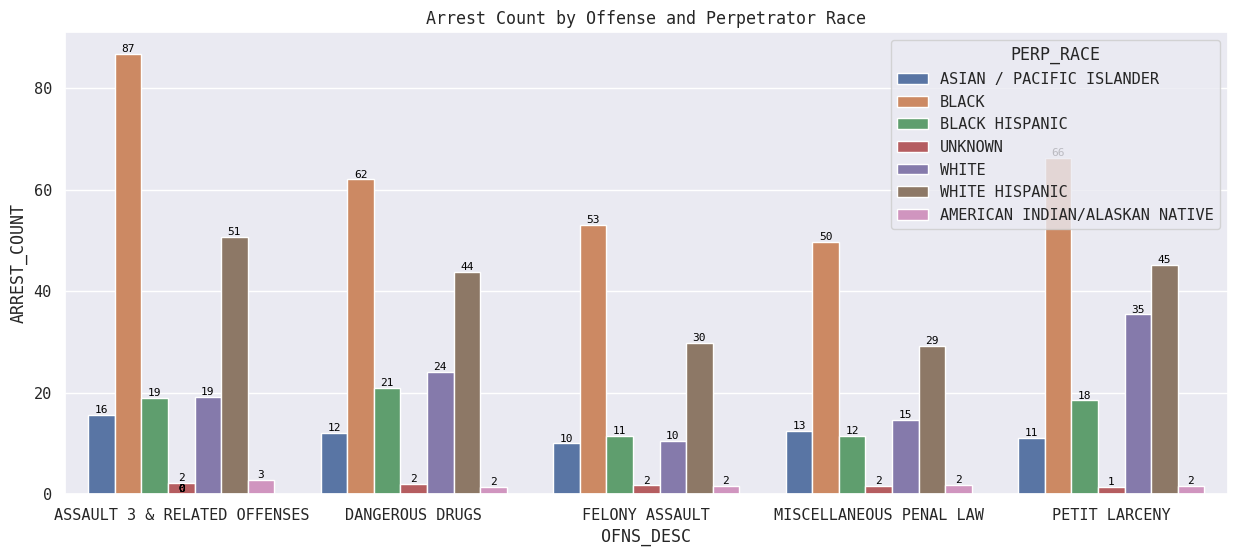

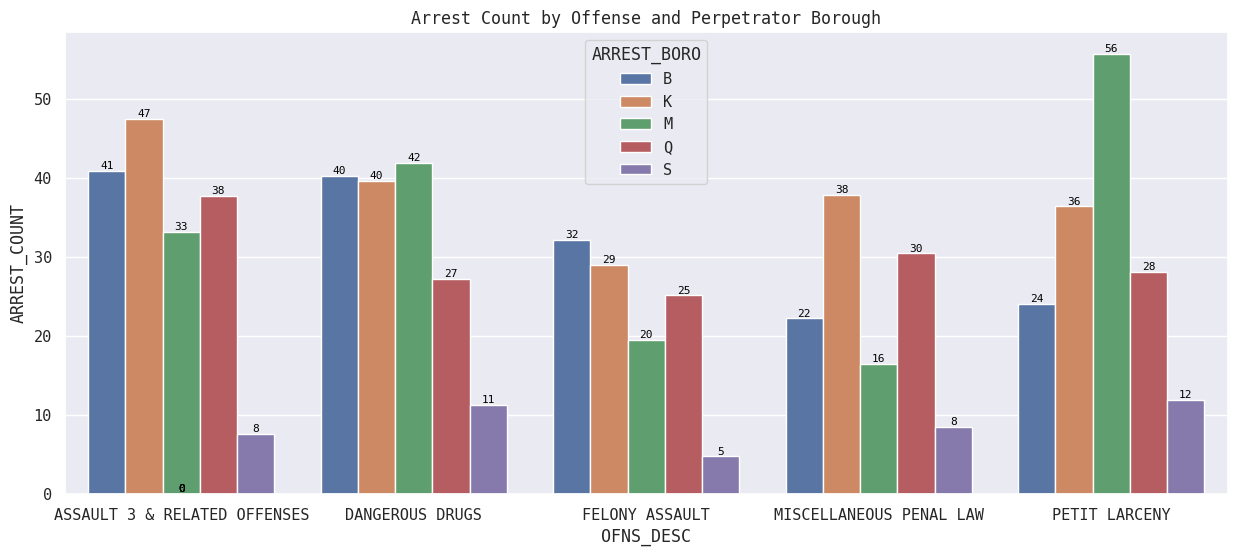

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='monospace', font_scale=1, color_codes=True)





plt.figure(figsize=(15, 6))
a = sns.barplot(data=df_demographics_advanced, x='OFNS_DESC', y='ARREST_COUNT', hue='PERP_SEX', errorbar=None)
plt.title('Arrest Count by Offense and Perpetrator Sex')
for p in a.patches:
    height = p.get_height()
    a.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height), 
               ha='center', va='bottom', fontsize=8, color='black')
plt.show()

plt.figure(figsize=(15, 6))
b = sns.barplot(data=df_demographics_advanced, x='OFNS_DESC', y='ARREST_COUNT', hue='PERP_RACE', errorbar=None)
plt.title('Arrest Count by Offense and Perpetrator Race')
for p in b.patches:
    height = p.get_height()
    b.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height), 
               ha='center', va='bottom', fontsize=8, color='black')
plt.show()

plt.figure(figsize=(15, 6))
c = sns.barplot(data=df_demographics_advanced, x='OFNS_DESC', y='ARREST_COUNT', hue='ARREST_BORO', errorbar=None)
plt.title('Arrest Count by Offense and Perpetrator Borough')
for p in c.patches:
    height = p.get_height()
    c.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height), 
               ha='center', va='bottom', fontsize=8, color='black')
plt.show()